# Making Necessary Imports:

In [ ]:
!pip install dython

In [ ]:
import pandas as pd;

import numpy as np;

from sklearn.preprocessing import LabelEncoder;
from sklearn.decomposition import PCA;

import matplotlib.pyplot as plt;

import seaborn as sns;

from sklearn import preprocessing;
from sklearn.preprocessing import OneHotEncoder;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.model_selection import train_test_split;

from dython import nominal;

# configs:
pd.options.display.max_columns = None;

# Initializing the Constants to be Used in The Program: 

In [ ]:
# "adult.data" file.
inputDataURL = "https://raw.githubusercontent.com/Aditya-163/MLDA-1-Project-1/main/Data/adult.data"; 
# "adult.test" file.
testDataURL = "https://raw.githubusercontent.com/Aditya-163/MLDA-1-Project-1/main/Data/adult.test";

# Attributes in the data.
allAttrs = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]; 
xAttrs = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"];
yAttrs = ["income"];

# Numerical Attributes:
numXAttrs = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"];

# Nominal Attributes:
nominalXAttrs = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"];

# Reading The Required Data:

In [ ]:
# Training Data.
inputData = pd.read_csv(inputDataURL, names=allAttrs, na_values=" ?");
inputData = inputData.dropna();
print("Some rows from the input data are shown below:");
print(inputData.head());

# Test Data.
testData = pd.read_csv(testDataURL, names=allAttrs, na_values=" ?");
testData = testData.dropna();

# Concataneted Data
data = pd.concat([inputData,testData]);

Some rows from the input data are shown below:
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174      

# Pre-Processing and Visualizing The Data:

### Normalizing Numerical Data:

In [ ]:
data[numXAttrs] = preprocessing.MinMaxScaler().fit_transform(data[numXAttrs]);

### Scatter Plot of The  Data:

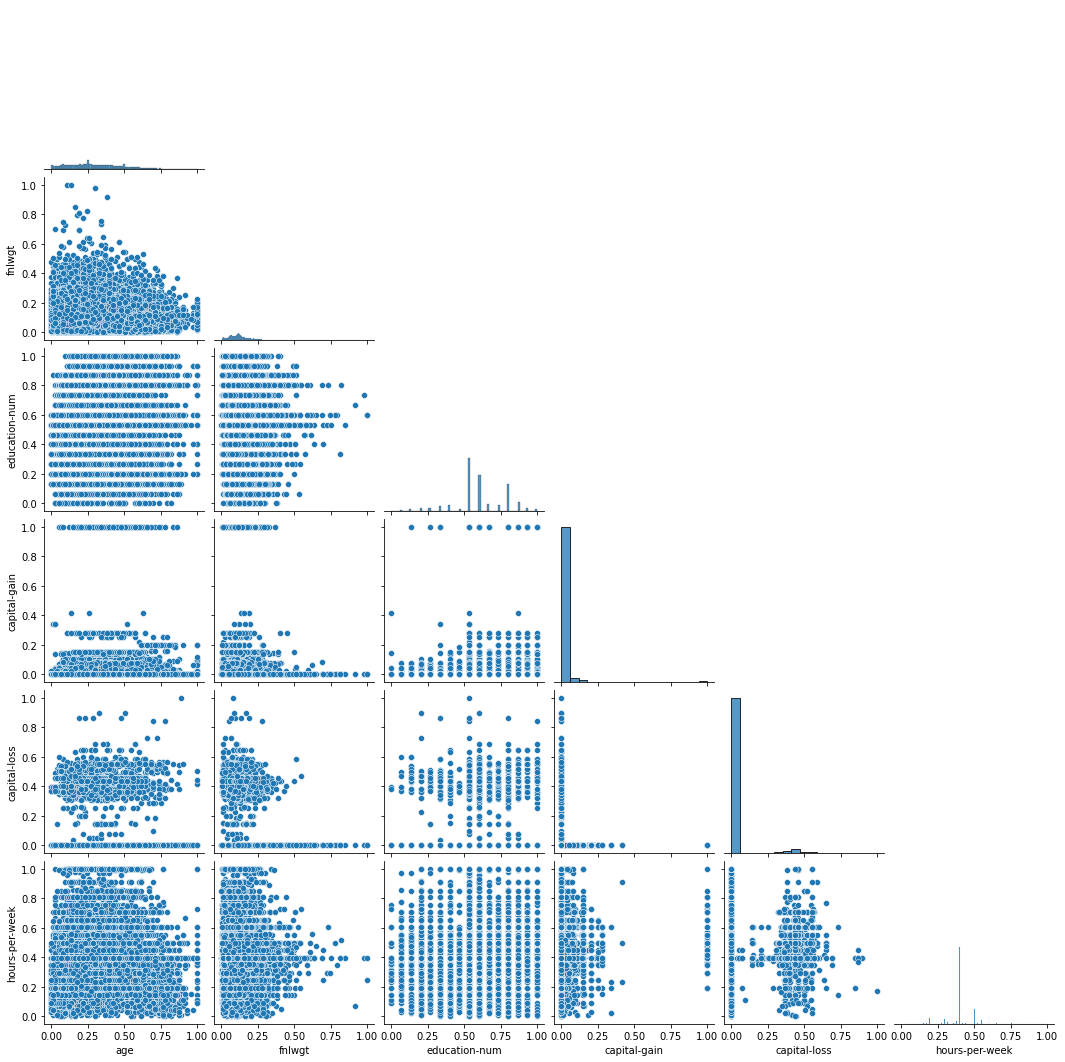

In [ ]:
numData = data[numXAttrs];
sns.pairplot(numData,markers="o",corner=True);

### Visualizing Categorical Data:

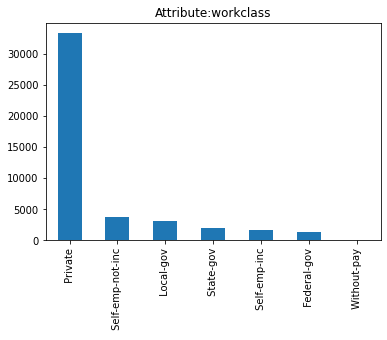

In [ ]:
axNomi = data[nominalXAttrs[0]].value_counts().plot(kind='bar');
axNomi.set_title("Attribute:" + nominalXAttrs[0]);
axNomi.plot();

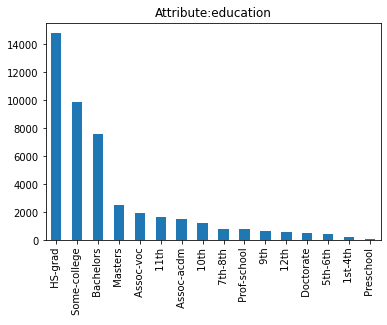

In [ ]:
axNomi = data[nominalXAttrs[1]].value_counts().plot(kind='bar');
axNomi.set_title("Attribute:" + nominalXAttrs[1]);
axNomi.plot();

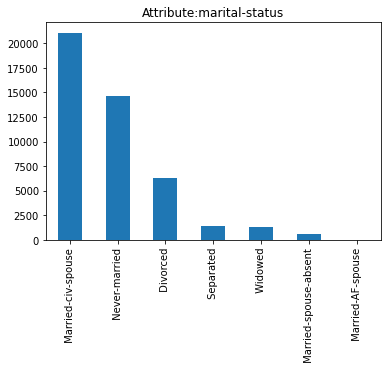

In [ ]:
axNomi = data[nominalXAttrs[2]].value_counts().plot(kind='bar');
axNomi.set_title("Attribute:" + nominalXAttrs[2]);
axNomi.plot();

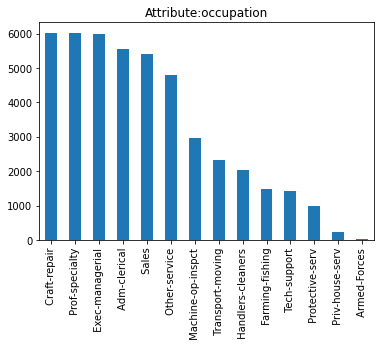

In [ ]:
axNomi = data[nominalXAttrs[3]].value_counts().plot(kind='bar');
axNomi.set_title("Attribute:" + nominalXAttrs[3]);
axNomi.plot();

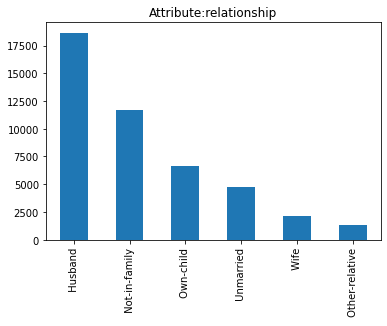

In [ ]:
axNomi = data[nominalXAttrs[4]].value_counts().plot(kind='bar');
axNomi.set_title("Attribute:" + nominalXAttrs[4]);
axNomi.plot();

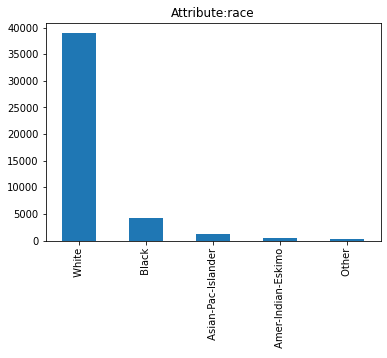

In [ ]:
axNomi = data[nominalXAttrs[5]].value_counts().plot(kind='bar');
axNomi.set_title("Attribute:" + nominalXAttrs[5]);
axNomi.plot();

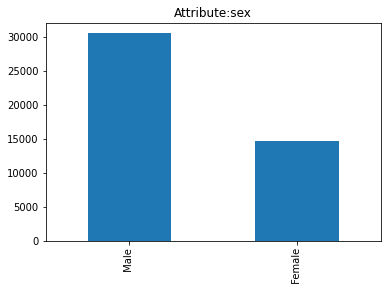

In [ ]:
axNomi = data[nominalXAttrs[6]].value_counts().plot(kind='bar');
axNomi.set_title("Attribute:" + nominalXAttrs[6]);
axNomi.plot();

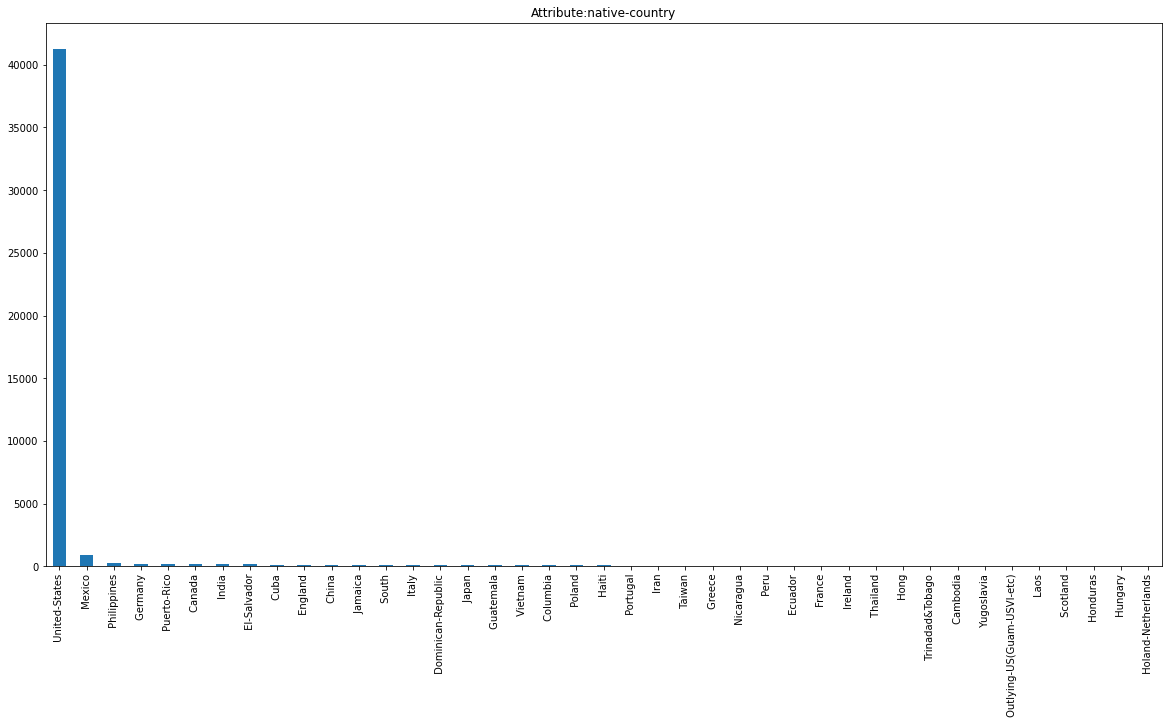

In [ ]:
axNomi = data[nominalXAttrs[7]].value_counts().plot(kind='bar');
axNomi.set_title("Attribute:" + nominalXAttrs[7]);
axNomi.plot();
axNomi.figure.set_size_inches(20,10);

### Splitting The Input and Output Parts in the data:

In [ ]:
X = data[xAttrs];
X.reset_index(drop=True, inplace=True);

Y = data[yAttrs];
Y = Y.replace(to_replace =[" <=50K"," <=50K."], value ="<=50K");
Y = Y.replace(to_replace =[" >50K"," >50K."], value =">50K");
Y.reset_index(drop=True, inplace=True);

### PCA On Numerical Data:

Number of PCs for explaining the required variance is:
5


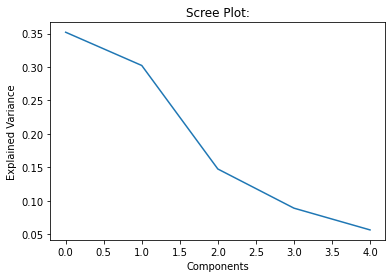

Input data after reducing dimensions using PCA:
           workclass   education       marital-status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native-country       PC1       PC2  \
0   Not-in-family   White     Male   United-States  0.076161 -0.170391   
1         Husband   White     Male   United-States  0.164323 -0.072032   
2   Not-in-family   White     Male   United-States -0.038107  0.067419   
3         Husband   Black     Male   United-States  0.100120  0.269258   
4            Wife   Black   Female            Cuba -0.069226 -0.227917   

        PC3       PC4       PC5  
0 -0.04910

In [ ]:
Ypca = Y;

pca = PCA(0.90);
pca.fit(X[numXAttrs]);
XDimReduced = pca.transform(X[numXAttrs]);

print("Number of PCs for explaining the required variance is:");
print(XDimReduced.shape[1]);

# Scree Plot!
plt.plot(pca.explained_variance_ratio_);
plt.ylabel('Explained Variance');
plt.xlabel('Components');
plt.title("Scree Plot:")
plt.show();


Xpca = pd.DataFrame({'PC1':XDimReduced[:,0], 'PC2':XDimReduced[:,1], 'PC3':XDimReduced[:,2], 'PC4':XDimReduced[:,3], 'PC5':XDimReduced[:,4]});

Xpca = pd.concat([X,Xpca],axis=1);
XpcaAttrs = nominalXAttrs + ["PC1","PC2","PC3","PC4","PC5"];
Xpca = Xpca[XpcaAttrs];
print("Input data after reducing dimensions using PCA:");
print(Xpca.head());

### Correlation Between Nominal Variables:

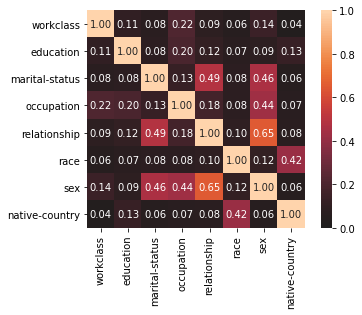

Input data after reducing dimensions using PCA and Correlation:
           workclass   education       marital-status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     race      sex  native-country       PC1       PC2       PC3       PC4  \
0   White     Male   United-States  0.076161 -0.170391 -0.049102 -0.030266   
1   White     Male   United-States  0.164323 -0.072032 -0.334267 -0.018274   
2   White     Male   United-States -0.038107  0.067419  0.005250 -0.014663   
3   Black     Male   United-States  0.100120  0.269258  0.009311 -0.014516   
4   Black   Female            Cuba -0.069226 -0.227917 -0.032372 -0.021670   

    

In [ ]:
XWithNominalAttrs = X[nominalXAttrs];
correlationMatrixForNominalData = nominal.associations(XWithNominalAttrs, nominal_columns='all'); # Uses Correlation Ratio for finding the correlation!

# sex (gender) and relationship have a correlation of 0.65, hence eliminating relationship attribute from our data!
XpcaAttrs.remove('relationship');
Xpca = Xpca[XpcaAttrs];
XpcaAttrs.append('relationship');
print("Input data after reducing dimensions using PCA and Correlation:");
print(Xpca.head());

# Ref: https://github.com/shakedzy/dython/issues/2

### Encoding Ordinal Data:

In [ ]:
X = pd.get_dummies(X,drop_first=True);
Y = pd.get_dummies(Y,drop_first=True);
X.reset_index(drop=True, inplace=True);
Y.reset_index(drop=True, inplace=True);
print("X shape:");
print(X.shape);
print("X dtypes:");
print(X.dtypes);
print("Y shape:");
print(Y.shape);
print("Y dtypes:");
print(Y.dtypes);

Xpca = pd.get_dummies(Xpca,drop_first=True);
Ypca = pd.get_dummies(Ypca,drop_first=True);
Xpca.reset_index(drop=True, inplace=True);
Ypca.reset_index(drop=True, inplace=True);
print("Xpca shape:");
print(Xpca.shape);
print("Xpca dtypes:");
print(Xpca.dtypes);
print("Ypca shape:");
print(Ypca.shape);
print("Ypca dtypes:");
print(Ypca.dtypes);

X shape:
(45222, 96)
X dtypes:
age                                float64
fnlwgt                             float64
education-num                      float64
capital-gain                       float64
capital-loss                       float64
                                    ...   
native-country_ Thailand             uint8
native-country_ Trinadad&Tobago      uint8
native-country_ United-States        uint8
native-country_ Vietnam              uint8
native-country_ Yugoslavia           uint8
Length: 96, dtype: object
Y shape:
(45222, 1)
Y dtypes:
income_>50K    uint8
dtype: object
Xpca shape:
(45222, 90)
Xpca dtypes:
PC1                                float64
PC2                                float64
PC3                                float64
PC4                                float64
PC5                                float64
                                    ...   
native-country_ Thailand             uint8
native-country_ Trinadad&Tobago      uint8
native-country_ United-S

# KNN (Without Using PCA and Correlation):

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/usr

The accuracy on the test set is:
0.8293168251160734


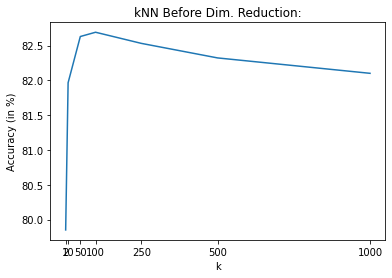

In [ ]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.10, random_state=42);
XTrainNoV, XValid, YTrainNoV, YValid = train_test_split(XTrain, YTrain, test_size = 0.20, random_state=42);

kValues = [2,10,50,100,250,500,1000];
accuracies = list();

for k in kValues:
  KNN = KNeighborsClassifier(n_neighbors=k);
  KNN.fit(XTrainNoV, YTrainNoV);
  accuracies.append(KNN.score(XValid, YValid));

fig, ax = plt.subplots(1)

xAxisData = np.array(kValues)
yAxisData = np.array(accuracies);
yAxisData = yAxisData*100;

ax.plot(xAxisData,yAxisData);
 
ax.set_xticks(kValues);
ax.set_xticklabels(kValues);

ax.set_xlabel("k");
ax.set_ylabel("Accuracy (in %)");
ax.set_title("kNN Before Dim. Reduction:");

KNN = KNeighborsClassifier(n_neighbors=100);
KNN.fit(XTrain,YTrain);
print("The accuracy on the test set is:");
print(KNN.score(XTest,YTest));

# KNN (With Using PCA and Correlation):



(30298, 90)
(14924, 90)
(30298, 1)
(14924, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

The accuracy on the test set is:
0.8300723666577325


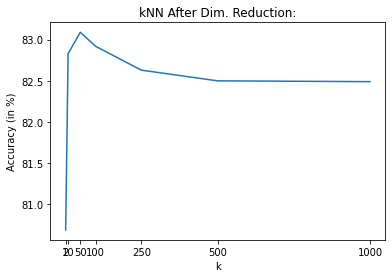

In [ ]:
XpcaTrain, XpcaTest, YpcaTrain, YpcaTest = train_test_split(Xpca, Ypca, test_size = 0.33, random_state=42);
XpcaTrainNoV, XpcaValid, YpcaTrainNoV, YpcaValid = train_test_split(XpcaTrain, YpcaTrain, test_size = 0.33, random_state=42);

print(XpcaTrain.shape);
print(XpcaTest.shape);
print(YpcaTrain.shape);
print(YpcaTest.shape);


kValues = [2,10,50,100,250,500,1000];
accuracies = list();

for k in kValues:
  KNN = KNeighborsClassifier(n_neighbors=k);
  KNN.fit(XpcaTrainNoV, YpcaTrainNoV);
  accuracies.append(KNN.score(XpcaValid, YpcaValid));

fig, ax = plt.subplots(1)

xAxisData = np.array(kValues)
yAxisData = np.array(accuracies);
yAxisData = yAxisData*100;

ax.plot(xAxisData,yAxisData);
 
ax.set_xticks(kValues);
ax.set_xticklabels(kValues);

ax.set_xlabel("k");
ax.set_ylabel("Accuracy (in %)");
ax.set_title("kNN After Dim. Reduction:");

KNN = KNeighborsClassifier(n_neighbors=50);
KNN.fit(XpcaTrain,YpcaTrain);
print("The accuracy on the test set is:");
print(KNN.score(XpcaTest,YpcaTest));